In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics import mean_absolute_error, confusion_matrix

In [2]:
DoD = pd.read_csv('Data_Master.csv')
DoD = DoD.drop('Dates', axis=1)
DoD = DoD.drop('Date', axis=1)
DoD = DoD.drop('BTC_Price_Movement_DOD_UD', axis=1)
DoD = DoD.drop('BTC_Price_Movement_ID_UD', axis=1)
DoD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Bitcoin_Volume             507 non-null    float64
 1   Bitcoin_Price              507 non-null    float64
 2   Bitcoin_Price_Close        507 non-null    float64
 3   Ethereum_Price             507 non-null    float64
 4   Doge_Price                 507 non-null    float64
 5   Litecoin_Price             507 non-null    float64
 6   SP500                      507 non-null    float64
 7   UST_1Y_Maturity            507 non-null    float64
 8   UST_10Y_Maturity           507 non-null    float64
 9   Crude_Oil                  507 non-null    float64
 10  Gold                       507 non-null    float64
 11  Copper                     507 non-null    float64
 12  Corn                       507 non-null    float64
 13  Singapore_Dollar           507 non-null    float64

In [3]:
from sklearn.model_selection import train_test_split

y = DoD['BTC_Price_Movement_DOD_10']
X = DoD.drop(['BTC_Price_Movement_DOD_10'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,  
                                                    stratify=DoD['BTC_Price_Movement_DOD_10'],
                                                    random_state=88,)
X_train.shape, X_test.shape

((354, 24), (153, 24))

In [4]:
negative = np.sum(y_train == 0)
positive = np.sum(y_train == 1)
print(pd.Series({'0': negative, '1': positive}))

0    182
1    172
dtype: int64


- For the training data, the price on the following day fell on 182 occassions
- For the trianing data, the price on the following day increased 172 occassions

- Baseline model will predict with 48.5% accuracy if the price of Bitcoin will increase the following day

In [5]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(min_samples_leaf=5, 
                             ccp_alpha=0.001,
                             random_state = 88)

dtc = dtc.fit(X_train, y_train)

Node count = 89


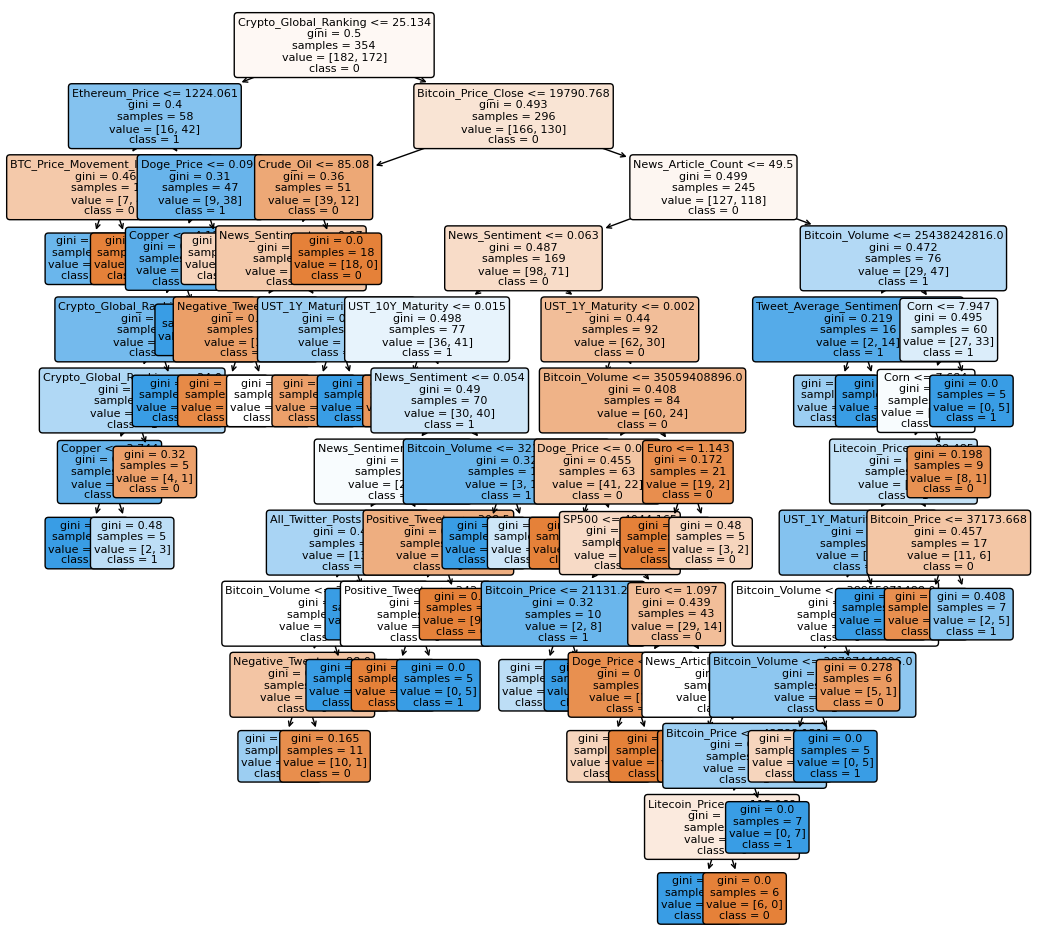

In [6]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

print('Node count =', dtc.tree_.node_count)
plt.figure(figsize=(12,12))
plot_tree(dtc, 
          feature_names=X_train.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=True,
          rounded=True,
          fontsize=8) 
plt.show()

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

y_pred = dtc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm)
# print('Precision:',precision_score(y_test, y_pred))
# print('Recall:',recall_score(y_test, y_pred))

acc = (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
TPR = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])
FPR = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])
print('Accuracy is: %.4f' %acc)
print('TPR is: %.4f' % TPR)
print('FPR is: %.4f' % FPR)

Confusion Matrix : 
 [[34 44]
 [34 41]]
Accuracy is: 0.4902
TPR is: 0.5467
FPR is: 0.5641


Node count = 27


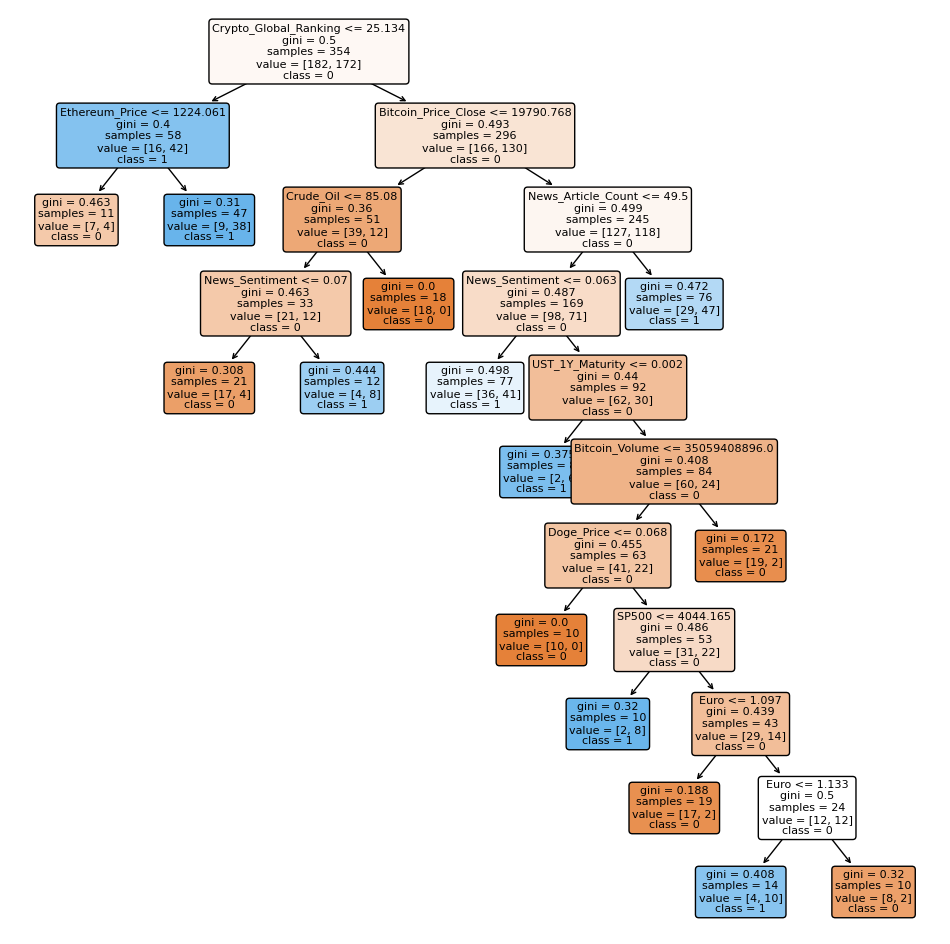

In [35]:
dtc2 = DecisionTreeClassifier(min_samples_leaf=8, 
                              ccp_alpha=0.008,
                              random_state = 88)

dtc2 = dtc2.fit(X_train, y_train)

print('Node count =', dtc2.tree_.node_count)
plt.figure(figsize=(12,12))
plot_tree(dtc2, 
          feature_names=X_train.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=True,
          rounded=True,
          fontsize=8)  
plt.show() 

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

y_pred = dtc2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm)
# print('Precision:',precision_score(y_test, y_pred))
# print('Recall:',recall_score(y_test, y_pred))

acc = (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
TPR = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])
FPR = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])
print('Accuracy is: %.4f' %acc)
print('TPR is: %.4f' % TPR)
print('FPR is: %.4f' % FPR)

Confusion Matrix : 
 [[29 49]
 [21 54]]
Accuracy is: 0.5425
TPR is: 0.7200
FPR is: 0.6282


In [37]:
def OSR2(model, X_test, y_test, y_train):
    
    y_pred = model.predict(X_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
                 
    return (1 - SSE/SST)

In [38]:
print('OSR2:', OSR2(dtc2, X_test, y_test, y_train))

OSR2: -0.8306324986664859


In [12]:
X_train.shape

(354, 24)

In [76]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(min_samples_split=10, 
                            ccp_alpha=0.005,
                            random_state = 88)



dtr = dtr.fit(X_train, y_train)

Node count = 9


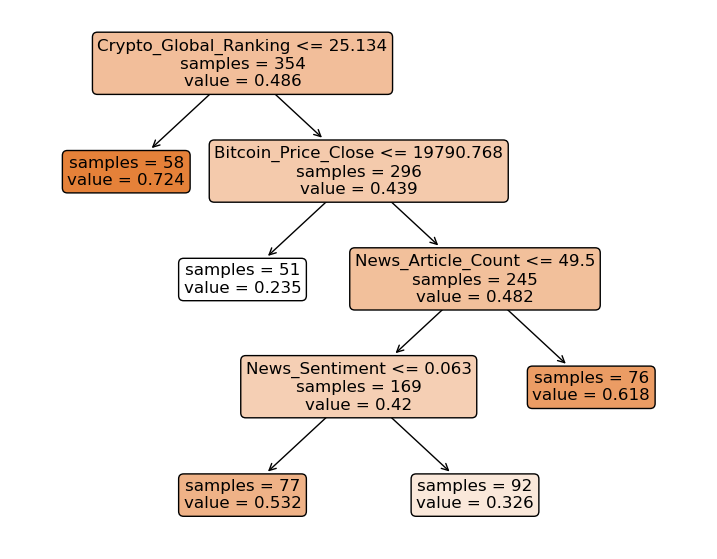

In [77]:
print('Node count =', dtr.tree_.node_count)
plt.figure(figsize=(9,7))
plot_tree(dtr, 
          feature_names=X_train.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=False,
          rounded=True,
          fontsize=12)
plt.show()

In [15]:
print('OSR2:', OSR2(dtr, X_test, y_test, y_train))

OSR2: -0.12802533122863657


In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold

grid_values = {'ccp_alpha': np.linspace(0, 0.001, 51)}

dtr = DecisionTreeRegressor(min_samples_leaf=5, min_samples_split=20, random_state=88)
### Note that the line below is important. It ensures that the training data is split into
### five folds randomly. Recall what we've seen in the discussion slides that by default,
### GridSearchCV will split the training data without shuffling. 
cv = KFold(n_splits=5,random_state=1,shuffle=True) 
### by setting random_state as a fixed number, we ensure that each time the GridSearchCV splits data, we get the 
### same split.
dtr_cv = GridSearchCV(dtr, param_grid=grid_values, scoring='r2', cv=cv, verbose=0)
dtr_cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=DecisionTreeRegressor(min_samples_leaf=5,
                                             min_samples_split=20,
                                             random_state=88),
             param_grid={'ccp_alpha': array([0.0e+00, 2.0e-05, 4.0e-05, 6.0e-05, 8.0e-05, 1.0e-04, 1.2e-04,
       1.4e-04, 1.6e-04, 1.8e-04, 2.0e-04, 2.2e-04, 2.4e-04, 2.6e-04,
       2.8e-04, 3.0e-04, 3.2e-04, 3.4e-04, 3.6e-04, 3.8e-04, 4.0e-04,
       4.2e-04, 4.4e-04, 4.6e-04, 4.8e-04, 5.0e-04, 5.2e-04, 5.4e-04,
       5.6e-04, 5.8e-04, 6.0e-04, 6.2e-04, 6.4e-04, 6.6e-04, 6.8e-04,
       7.0e-04, 7.2e-04, 7.4e-04, 7.6e-04, 7.8e-04, 8.0e-04, 8.2e-04,
       8.4e-04, 8.6e-04, 8.8e-04, 9.0e-04, 9.2e-04, 9.4e-04, 9.6e-04,
       9.8e-04, 1.0e-03])},
             scoring='r2')

In [44]:
grid_values = {'ccp_alpha': np.linspace(0, 0.10, 201),
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [30],
               'random_state': [88]}

            
dtr = DecisionTreeRegressor()
dtr_cv_acc = GridSearchCV(dtr, param_grid = grid_values, scoring = 'r2', cv=10, verbose=1) # default scoring metric to optimize is accuracy, used as default if none given.
dtr_cv_acc.fit(X_train, y_train)

Fitting 10 folds for each of 201 candidates, totalling 2010 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'ccp_alpha': array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
       0.004 , 0.0045, 0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075,
       0.008 , 0.0085, 0.009 , 0.0095, 0.01  , 0.0105, 0.011 , 0.0115,
       0.012 , 0.0125, 0.013 , 0.0135, 0.014 , 0.0145, 0.015 , 0.0155,
       0.016 , 0.0165, 0.017 , 0.0175, 0.018 , 0.0185, 0.019 , 0.0195,
       0.02  , 0.020...
       0.08  , 0.0805, 0.081 , 0.0815, 0.082 , 0.0825, 0.083 , 0.0835,
       0.084 , 0.0845, 0.085 , 0.0855, 0.086 , 0.0865, 0.087 , 0.0875,
       0.088 , 0.0885, 0.089 , 0.0895, 0.09  , 0.0905, 0.091 , 0.0915,
       0.092 , 0.0925, 0.093 , 0.0935, 0.094 , 0.0945, 0.095 , 0.0955,
       0.096 , 0.0965, 0.097 , 0.0975, 0.098 , 0.0985, 0.099 , 0.0995,
       0.1   ]),
                         'max_depth': [30], 'min_samples_leaf': [5],
                         'min_samples_split': [20], 'random_state': [88]},
             scoring='r2', verbose=1)

In [45]:
acc = dtr_cv_acc.cv_results_['mean_test_score'] # what sklearn calls mean_test_score is the holdout set, i.e. the validation set.
ccp = dtr_cv_acc.cv_results_['param_ccp_alpha'].data

pd.DataFrame({'ccp alpha' : ccp, 'Validation Accuracy': acc}).head(20)
dtr_cv_acc.best_params_

{'ccp_alpha': 0.0175,
 'max_depth': 30,
 'min_samples_leaf': 5,
 'min_samples_split': 20,
 'random_state': 88}

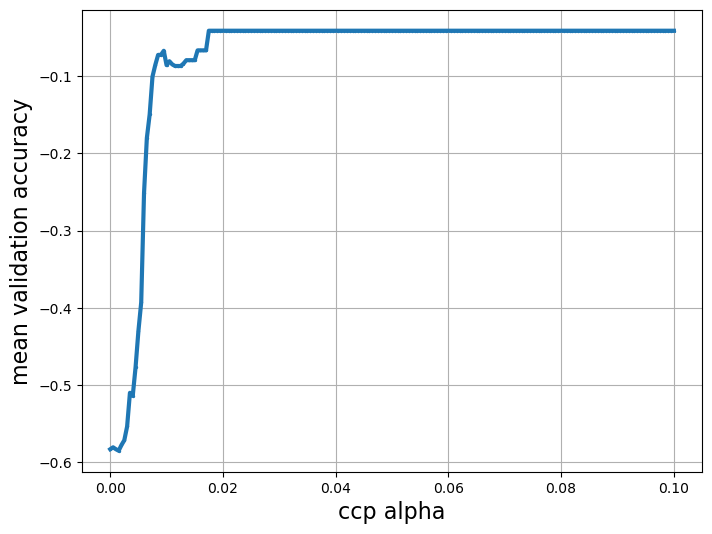

In [46]:
plt.figure(figsize=(8, 6))
plt.xlabel('ccp alpha', fontsize=16)
plt.ylabel('mean validation accuracy', fontsize=16)
plt.scatter(ccp, acc, s=2)
plt.plot(ccp, acc, linewidth=3)
plt.grid(True, which='both')
plt.show()

In [47]:
dtr2 = DecisionTreeRegressor(ccp_alpha = 0.001,
               min_samples_leaf = 5,
               min_samples_split = 20,
               max_depth = 30,
               random_state = 88)

dtr3 = dtr2.fit(X_train, y_train)

In [48]:
def OSR2(model, X_test, y_test, y_train):
    
    y_pred = model.predict(X_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
                 
    return (1 - SSE/SST)

In [49]:
cart_mae = mean_absolute_error(y_test, dtr2.predict(X_test))

In [52]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [54]:
X_train.head(2)

,Bitcoin_Volume,Bitcoin_Price,Bitcoin_Price_Close,Ethereum_Price,Doge_Price,Litecoin_Price,SP500,UST_1Y_Maturity,UST_10Y_Maturity,Crude_Oil,...,Euro,All_Twitter_Posts,Positive_Tweets,Negative_Tweet,Neutral_Tweets,Tweet_Average_Sentiment,News_Article_Count,News_Sentiment,Crypto_Global_Ranking,BTC_Price_Movement_ID_10
256,2.495778e+10,21084.64844,21231.65625,1226.844727,0.067124,55.992283,3911.740000,0.0285,0.0315,107.62,...,1.053162,1322,439,161,722,0.063569,45,0.062029,31.818182,1
236,3.939340e+10,29706.13867,29832.91406,3171.691895,0.143417,112.461334,4112.836667,0.0221,0.0301,118.87,...,1.089823,482,153,60,269,0.078677,63,0.053484,46.384615,1
